## Ejercicio 1

Se quiere encontrar el máximo de la siguiente función:

$z = -(x - 2)^2 - (y - 3)^2 + 4$

(a) Aplicar gradiente e igualar a zero para encontrar los valores de $x$ e $y$ donde $z$ tiene un máximo. Cuál es el valor del máximo?

(b) Aplicar SGD para encontrar la ubicación del máximo de manera numérica.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
plt.style.use('seaborn-poster')

### (a)

El gradiente de z:
$$
\nabla Z = (\frac{\partial Z}{\partial x} ; \frac{\partial Z}{\partial y}) = (-2 \cdot (x-2) ; -2 \cdot (y-3))
$$
Si lo igualamos $\nabla Z = (0,0)$, obtenemos que existe un máximo o mínimo local de la función en:
$$
\begin{cases}
      x = 2\\
      y = 3\\
\end{cases}   
$$

Dado que la función tiene concavidad negativa para todo $(x,y)$, la coordenada $(2,3)$ es un máximo.

Esto se puede comprobar en el siguiente gráfico de la función Z.

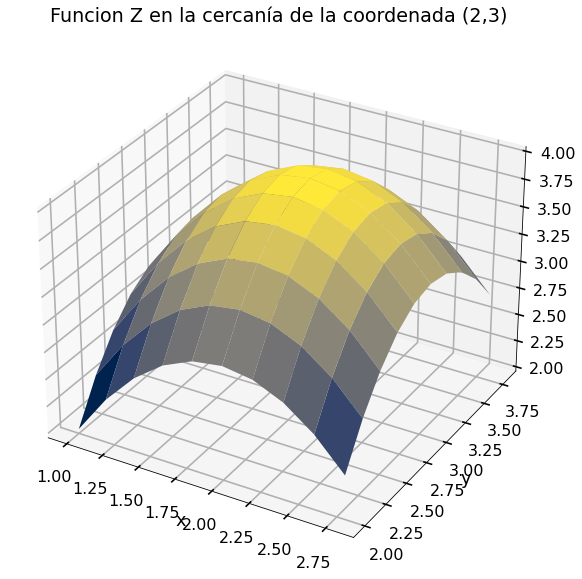

In [8]:
fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection='3d')
ax.grid()
x = np.arange(1, 3, 0.2)
y = np.arange(2, 4, 0.2)

X, Y = np.meshgrid(x, y)
Z = -(X-2)**2 -(Y-3)**2 + 4
surf = ax.plot_surface(X, Y, Z, cmap = plt.cm.cividis)
plt.title("Funcion Z en la cercanía de la coordenada (2,3)")
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### (b)
Para encontrar el máximo utilizando gradient descent, utilizamos la función derivada:
$$
\nabla Z = (\frac{\partial Z}{\partial x} ; \frac{\partial Z}{\partial y}) = (-2 \cdot (x-2) ; -2 \cdot (y-3))
$$
e iteramos hasta que el gradiente sea cercano a 0.

Nota: Dado que queremos encontrar el máximo, invertimos la funcion $\nabla Z$. De esta forma, el SGD encontrará un mínimo que equivaldrá al punto máximo de nuestra función original.

In [27]:
def my_SGD(func, x_o, learning_rate, max_iter=50, threshold=1e-6):
    vector = x_o
    found = False
    n_iters = 0
    for i in range(max_iter):
        diff = np.multiply(func(vector), -learning_rate)
        if(np.all(np.abs(diff) <= threshold)):
            found = True
            n_iters = i
            break
        vector = vector + diff
    
    if(found):
        print(f'Minimum found after {n_iters} iterations!')
    else:
        print('Warning: Max iterations reached. Gradient did not settle.')
    return vector

print(my_SGD(lambda p: (2*(p[0]-2) , 2*(p[1]-3)), x_o=(10.0, 15.0), learning_rate=0.2))

Minimum found after 31 iterations!
[2.00000106 3.00000159]
